In [1]:
#Dependencies
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt



In [2]:
# Create a filepath to read the data from
nba_path = r"NBA_player_of_the_week.csv"

In [3]:
# Read in the data
nba_data = pd.read_csv(nba_path)
nba_data.head()


,Player,Team,Conference,Date,Position,Height,Weight,Age,Draft Year,Seasons in league,Season,Season short,Pre-draft Team,Real_value,Height CM,Weight KG,Last Season
0,Norman Powell,Toronto Raptors,East,"Mar 9, 2020",SG,6'4,215,26,2015,4,2019-2020,2020,UCLA,0.5,193,97,1
1,LeBron James,Los Angeles Lakers,West,"Mar 9, 2020",F,6'8,250,35,2003,16,2019-2020,2020,St. Vincent St. Mary High School (Ohio),0.5,203,113,1
2,Giannis Antetokounmpo,Milwaukee Bucks,East,"Mar 2, 2020",F,6'11,242,25,2013,6,2019-2020,2020,Filathlitikos Div II Greece (Greece),0.5,211,109,1
3,Kristaps Porzingis,Dallas Mavericks,West,"Mar 2, 2020",FC,7'3,240,24,2015,4,2019-2020,2020,Real Betis Energia Plus (Spain),0.5,221,108,1
4,Jayson Tatum,Boston Celtics,East,"Feb 10, 2020",SF,6'8,208,21,2017,2,2019-2020,2020,Duke,0.5,203,94,1


In [4]:
#Create a dataframe
nba_data_df = pd.DataFrame(nba_data)


In [6]:
#Clean up the data for NBA teams
pow_team = nba_data['Team'].replace({'Washington Bullets':'Washington Wizards', 
                                                                'San Diego Clippers':'Los Angeles Clippers',
                                                                'Kansas City Kings':'Sacramento Kings',
                                                                'New Jersey Nets':'Brooklyn Nets',
                                                                'New Orleans Hornets':'New Orleans Pelicans',
                                                                'Charlotte Bobcats':'Charlotte Hornets',
                                                                'Seattle SuperSonics':'Oklahoma City Thunder'
                                              })
pow_team.value_counts()

Los Angeles Lakers        88
Oklahoma City Thunder     71
Houston Rockets           68
San Antonio Spurs         68
Cleveland Cavaliers       62
Miami Heat                59
Boston Celtics            57
Utah Jazz                 56
Golden State Warriors     52
Denver Nuggets            52
Phoenix Suns              50
Philadelphia Sixers       47
Chicago Bulls             47
Orlando Magic             46
Brooklyn Nets             44
Portland Trail Blazers    42
Atlanta Hawks             41
Washington Wizards        39
New York Knicks           39
Toronto Raptors           38
Detroit Pistons           38
Milwaukee Bucks           37
Dallas Mavericks          34
Los Angeles Clippers      30
Charlotte Hornets         28
Sacramento Kings          28
Indiana Pacers            27
Minnesota Timberwolves    27
New Orleans Pelicans      19
Memphis Grizzlies         10
Name: Team, dtype: int64

In [43]:
player_frequency = nba_data.Player.value_counts()
player_frequency.head()

LeBron James      64
Kobe Bryant       33
Kevin Durant      26
Michael Jordan    25
James Harden      24
Name: Player, dtype: int64

In [44]:
best_players = player_frequency[player_frequency >=12]
best_players

LeBron James             64
Kobe Bryant              33
Kevin Durant             26
Michael Jordan           25
James Harden             24
Karl Malone              23
Tim Duncan               23
Allen Iverson            23
Kevin Garnett            20
Shaquille O'Neal         20
Russell Westbrook        19
Dwyane Wade              19
Carmelo Anthony          19
Magic Johnson            18
Dwight Howard            18
Jason Kidd               17
Paul Pierce              17
Dirk Nowitzki            16
Larry Bird               15
David Robinson           15
Stephen Curry            14
Chris Paul               13
Giannis Antetokounmpo    13
Tracy McGrady            12
Hakeem Olajuwon          12
Patrick Ewing            12
Name: Player, dtype: int64

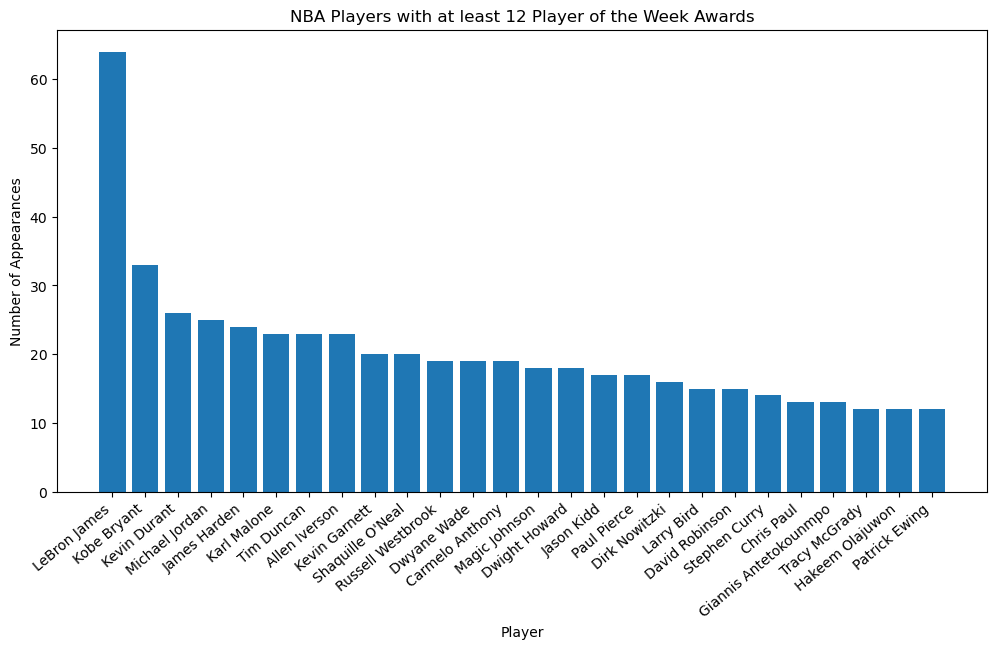

In [45]:
plt.figure(figsize=(12, 6))
plt.bar(best_players.index, best_players.values)
plt.xlabel('Player')
plt.ylabel('Number of Appearances')
plt.title('NBA Players with at least 12 Player of the Week Awards')
plt.xticks(rotation=40, ha='right') 
plt.show()

In [46]:
team_frequency = nba_data.Team.value_counts()
team_frequency

Los Angeles Lakers        88
Houston Rockets           68
San Antonio Spurs         68
Cleveland Cavaliers       62
Miami Heat                59
Boston Celtics            57
Utah Jazz                 56
Denver Nuggets            52
Golden State Warriors     52
Phoenix Suns              50
Chicago Bulls             47
Philadelphia Sixers       47
Oklahoma City Thunder     47
Orlando Magic             46
Brooklyn Nets             44
Portland Trail Blazers    42
Atlanta Hawks             41
New York Knicks           39
Washington Wizards        39
Toronto Raptors           38
Detroit Pistons           38
Milwaukee Bucks           37
Dallas Mavericks          34
Los Angeles Clippers      30
Charlotte Hornets         28
Sacramento Kings          28
Indiana Pacers            27
Minnesota Timberwolves    27
Seattle SuperSonics       24
New Orleans Pelicans      19
Memphis Grizzlies         10
Name: Team, dtype: int64

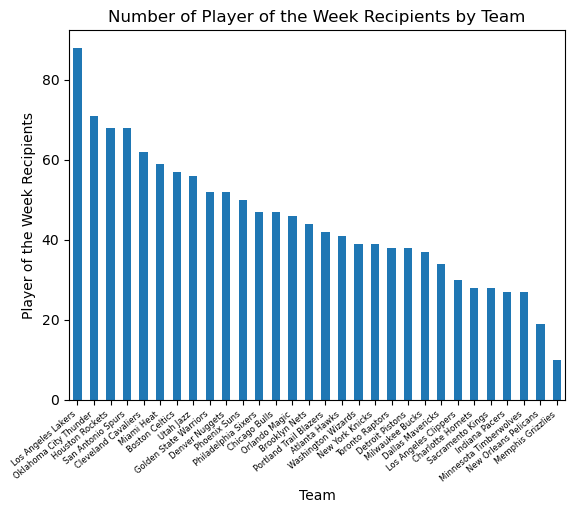

In [47]:
team_wins = pow_team.value_counts()
second_graph=team_wins.plot(kind='bar')
plt.xlabel("Team")
plt.ylabel("Player of the Week Recipients")
plt.title("Number of Player of the Week Recipients by Team")
plt.xticks(rotation=40, ha='right', fontsize=6)
plt.show()

In [40]:
average_age_per_season = nba_data_df.groupby('Season')['Age'].mean()
average_age_per_season


Season
1979-1980    25.565217
1980-1981    27.291667
1981-1982    27.043478
1982-1983    26.166667
1983-1984    26.739130
1984-1985    27.000000
1985-1986    26.695652
1986-1987    27.130435
1987-1988    26.173913
1988-1989    26.478261
1989-1990    26.391304
1990-1991    27.217391
1991-1992    26.956522
1992-1993    27.043478
1993-1994    27.347826
1994-1995    27.521739
1995-1996    28.166667
1996-1997    29.166667
1997-1998    29.304348
1998-1999    26.461538
1999-2000    26.304348
2000-2001    26.416667
2001-2002    26.136364
2002-2003    26.595745
2003-2004    26.239130
2004-2005    26.869565
2005-2006    25.456522
2006-2007    26.043478
2007-2008    26.804348
2008-2009    25.913043
2009-2010    26.739130
2010-2011    26.586957
2011-2012    26.781250
2012-2013    26.847826
2013-2014    26.260870
2014-2015    26.863636
2015-2016    27.136364
2016-2017    27.136364
2017-2018    27.282609
2018-2019    26.369565
2019-2020    26.750000
Name: Age, dtype: float64

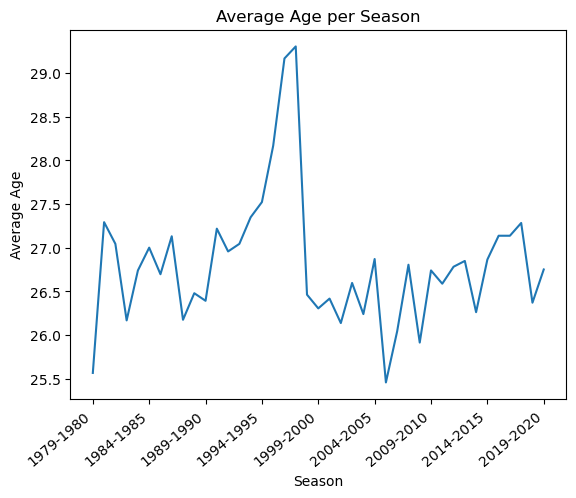

In [27]:
#Creating the graph to show the average age per season 
average_age_per_season.plot()
plt.title('Average Age per Season')
plt.xlabel('Seasons')
plt.ylabel('Average Age')
plt.xticks(rotation=40, ha='right') 
plt.show()



Text(0.5, 1.0, 'Histogram of Players Ages')

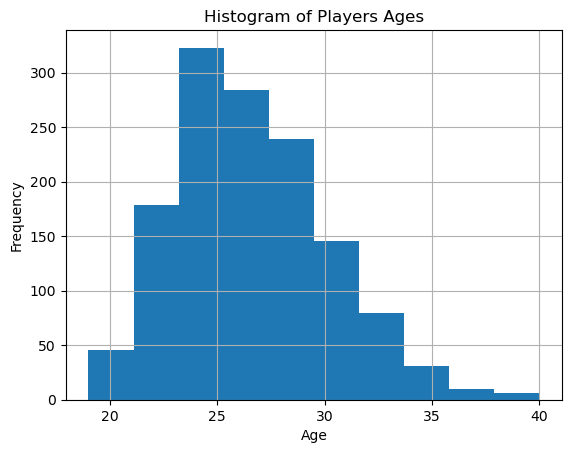

In [26]:
#Create a histogram of the players ages
nba_data_df['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Players Ages')


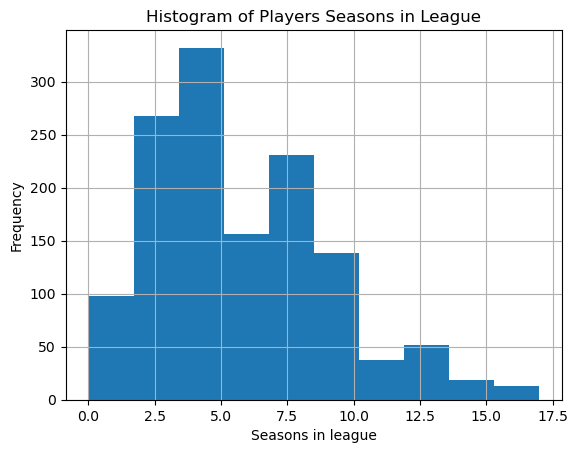

In [29]:
#Create a histogram of the players Seasons in league
nba_data_df['Seasons in league'].hist()
plt.xlabel('Seasons in league')
plt.ylabel('Frequency')
plt.title('Histogram of Players Seasons in League')
plt.show()

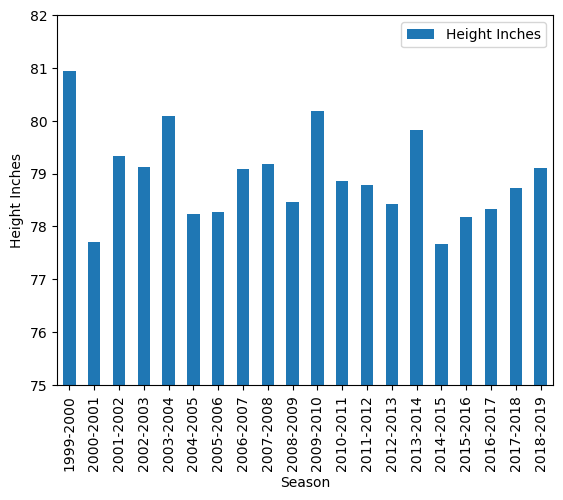

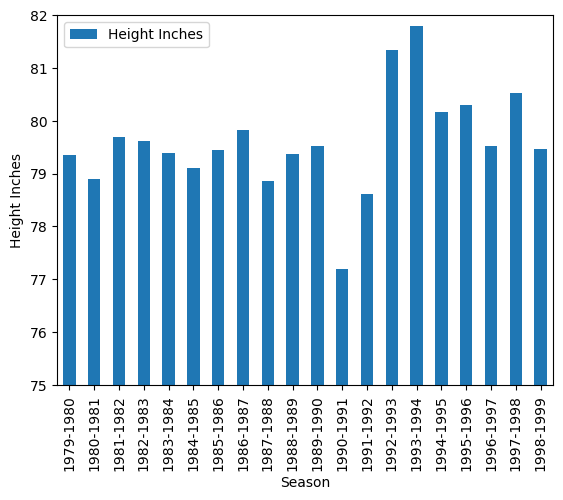

In [32]:
#Create dataframe for average height
avgheight_year = (pd.DataFrame(nba_data.groupby('Season')['Height CM'].mean()))
avgheight_year_inches = (avgheight_year)/2.54
avgheight_year_inches.iloc[20:40].plot(kind='bar', ylim=(75,82),ylabel='Height Inches').legend(['Height Inches'])
avgheight_year_inches.iloc[0:20].plot(kind='bar', ylim=(75,82),ylabel='Height Inches').legend(['Height Inches'])






In [49]:
#Cleaning data to consolidate positions as G, F, and C
nba_data['Position'] = nba_data['Position'].replace({'FC':'C','F-C':'C','G-F':'F','SF':'F','PF':'F','GF':'F','SG':'G','PG':'G'})

array([<Axes: ylabel='Position'>], dtype=object)

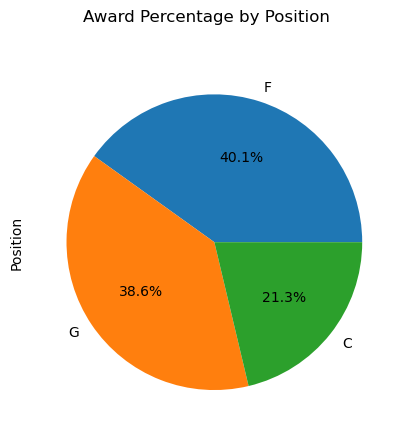

In [50]:
#What is the breakdown of awards by position
position_year=(nba_data['Position'].value_counts())
position_year.plot.pie(subplots=True,autopct = "%1.1f%%",title='Award Percentage by Position')


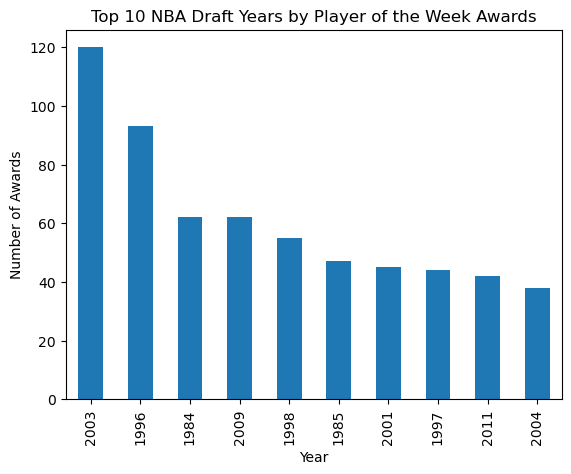

In [7]:
#Creating the graph to show the top 10 draft classes by year
count_of_years = nba_data_df['Draft Year'].value_counts()
first_graph = count_of_years.head(10).plot(kind='bar')
plt.title('Top 10 NBA Draft Years by Player of the Week Awards')
plt.xlabel('Year')
plt.ylabel('Number of Awards')
plt.show()

Text(0.5, 1.0, 'Players of the Week Drafted in 2003')

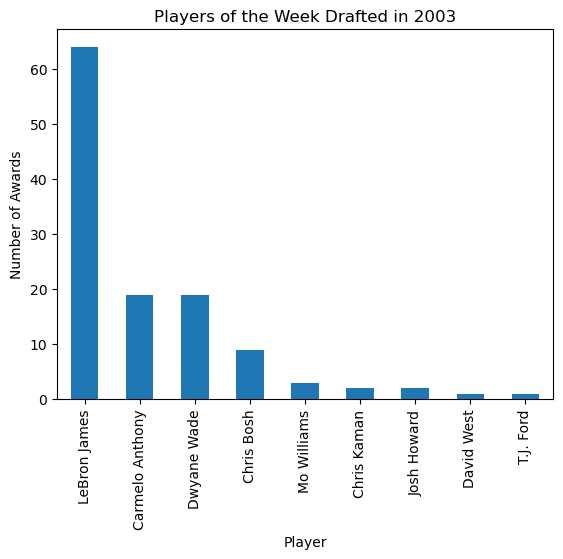

In [41]:
#Creating the graph for the 2003 draft class
draft_standout_df = nba_data_df.loc[nba_data_df['Draft Year'] == 2003]
count_of_2003 = draft_standout_df['Player'].value_counts()
college_graph = count_of_2003.plot(kind='bar', align='center')
xlabel = plt.xlabel('Player')
ylabel = plt.ylabel('Number of Awards')
plt.title("Players of the Week Drafted in 2003")

Text(0.5, 1.0, 'Players of the Week Drafted in 2011')

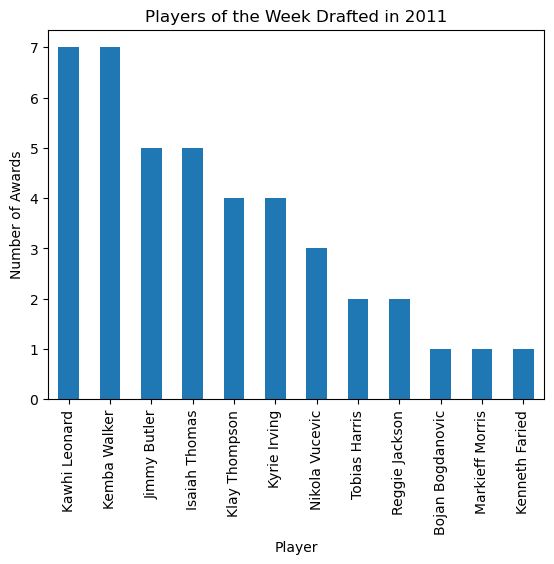

In [42]:
#Creating the graph for the 2011 draft class
draft2 = nba_data_df.loc[nba_data_df['Draft Year'] == 2011]
count_of_1996 = draft2['Player'].value_counts()
college_graph2 = count_of_1996.plot(kind='bar', align='center')
xlabel2 = plt.xlabel('Player')
ylabel2 = plt.ylabel('Number of Awards')
plt.title("Players of the Week Drafted in 2011")